In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


In [ ]:
!ls '/content/drive/MyDrive/Proyecto Analítica'
%cd '/content/drive/MyDrive/Proyecto Analítica'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Hacer una copia para conservar el original y poder comparar dataset inicial con el producto final

wat = pd.read_csv("wat.csv", sep=';', decimal=',')
dataset=wat.copy()

# Cambiar fecha de object a datetime para luego poder ordenar
dataset['Order Date']=pd.to_datetime(dataset['Order Date'])

dataset['Year'] = pd.DatetimeIndex(dataset['Order Date']).year
dataset['Month'] = pd.DatetimeIndex(dataset['Order Date']).month
dataset['Day'] = pd.DatetimeIndex(dataset['Order Date']).day
dataset['yyyymm'] = dataset.apply(lambda x: ''.join((str(x['Year']),str(x['Month']))),axis=1)
dataset['yyyymm'] = dataset['yyyymm'].astype(int)

df_sales_by_months = dataset[['Category','Year','Month','Sales']].groupby(['Category','Year','Month'],as_index=False).sum()
df_sales_by_months.head() # el .head() returns the first n rows, por default devuelve 5.
#dataset_by_month = dataset.loc[dataset['Month']==11,:]
#dataset_by_month
dataset.head()

,Row ID,Order Date,Ship Date,Country,State,Product ID,Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Day,yyyymm
0,1,2016-08-11,11/11/2016,United States,Kentucky,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,8,11,20168
1,2,2016-08-11,11/11/2016,United States,Kentucky,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,8,11,20168
2,3,2016-12-06,16/6/2016,United States,California,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,12,6,201612
3,4,2015-11-10,18/10/2015,United States,Florida,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,11,10,201511
4,5,2015-11-10,18/10/2015,United States,Florida,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,11,10,201511


In [ ]:
# Cuenta valores null
dataset.isnull().sum()
#no hay valores nulos

Row ID          0
Order Date      0
Ship Date       0
Country         0
State           0
Product ID      0
Category        0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
Year            0
Month           0
Day             0
yyyymm          0
dtype: int64

In [ ]:
#total de sales by category
df_sales_by_category = dataset[['Category','Sales']].groupby(['Category'],as_index=False).sum() 
# .groupby() involves some combination of splitting the object, applying a function, 
# and combining the results. This can be used to group large amounts of data and compute operations on these groups.
df_sales_by_category


,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


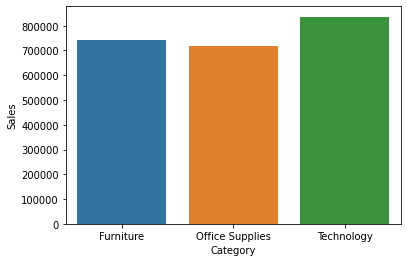

In [ ]:
# hacemos barplot para ver gráficamente
# sns.barplot (de seaborn): Show point estimates and errors as rectangular bars
sns.barplot(data=df_sales_by_category, x="Category", y="Sales")
plt.show()

In [ ]:
# total de sales by year. El groupby es el mismo que usamos arriba, solo que en vez de agrupar por category agrupamos por año.
# as_index: return object with group labels as the index
df_sales_by_year = dataset[['Year','Sales']].groupby(['Year'],as_index=False).sum()
df_sales_by_year

,Year,Sales
0,2014,484247.4981
1,2015,470532.5090
2,2016,609205.5980
3,2017,733215.2552


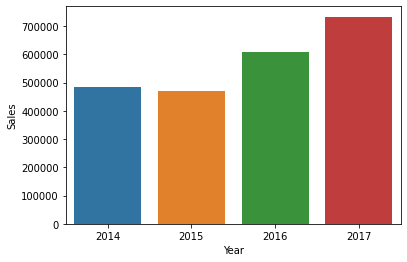

In [ ]:
# que pasa acá??
# could not interpret input 'year'
#Listo ya arreglé era acomodar el as_index
sns.barplot(data=df_sales_by_year, x="Year", y="Sales")
plt.show()

In [ ]:
df_sales_by_month = dataset[['Month','Sales']].groupby(['Month'],as_index=False).sum()
df_sales_by_month.head(3)

,Month,Sales
0,1,161083.5874
1,2,132721.3594
2,3,220064.6460


In [ ]:
df_sales_by_year_and_month = dataset[['Year','Month','Sales']].groupby(['Year','Month'],as_index=False).sum()
df_sales_by_year_and_month.head(3)

,Year,Month,Sales
0,2014,1,28953.706
1,2014,2,12743.108
2,2014,3,54801.906


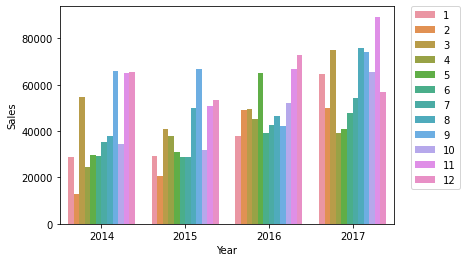

In [ ]:
sns.color_palette("husl", 9)
sns.barplot(data=df_sales_by_year_and_month, x="Year", y="Sales", hue="Month")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

In [ ]:
df_sales_by_category_and_year = dataset[['Year','Category','Sales']].groupby(['Year','Category'],as_index=False).sum()
df_sales_by_category_and_year.head(3)

,Year,Category,Sales
0,2014,Furniture,157192.8531
1,2014,Office Supplies,151776.4120
2,2014,Technology,175278.2330


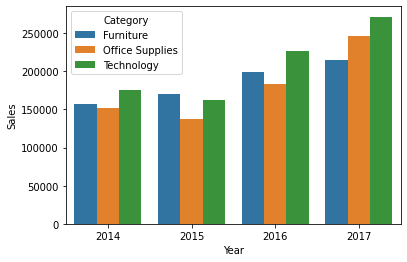

In [ ]:
sns.barplot(data=df_sales_by_category_and_year, x="Year", y="Sales", hue="Category")

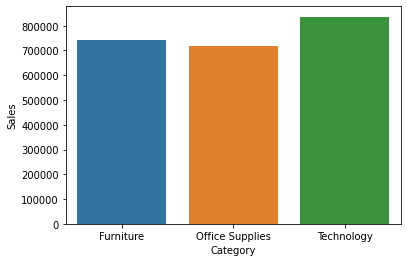

In [ ]:
sns.barplot(data=df_sales_by_category, x="Category", y="Sales")
plt.show()

In [ ]:
# df_final = dataset.loc[((dataset['Year']==2014)&(dataset['Month']==11)&(dataset['Day']==28))|
#                        (dataset['Year']==2015&dataset['Month']==11&dataset['Day']==27)|
#                        (dataset['Year']==2016&dataset['Month']==11&dataset['Day']==25)|
#                        (dataset['Year']==2017&dataset['Month']==11&dataset['Day']==24),:]
df_aux = dataset[['Year','Month','yyyymm','Day','Category','Sales']].groupby(['Year','Month','yyyymm','Day','Category'],as_index=False).sum()
df_aux

,Year,Month,yyyymm,Day,Category,Sales
0,2014,1,20141,2,Technology,468.900
1,2014,1,20141,3,Furniture,1893.995
2,2014,1,20141,3,Office Supplies,303.216
3,2014,1,20141,3,Technology,5.940
4,2014,1,20141,4,Office Supplies,119.888
...,...,...,...,...,...,...
2856,2017,12,201712,29,Office Supplies,282.440
2857,2017,12,201712,29,Technology,302.376
2858,2017,12,201712,30,Furniture,323.136
2859,2017,12,201712,30,Office Supplies,299.724


In [ ]:
df_final = df_aux.loc[((df_aux['Year']==2014)&(df_aux['Month']==11)&(df_aux['Day']==28))|
                       ((df_aux['Year']==2015)&(df_aux['Month']==11)&(df_aux['Day']==27))|
                       ((df_aux['Year']==2016)&(df_aux['Month']==11)&(df_aux['Day']==25))|
                       ((df_aux['Year']==2017)&(df_aux['Month']==11)&(df_aux['Day']==24)),
                       ['Year','Month','yyyymm','Category','Sales']
                       ]
df_final

,Year,Month,yyyymm,Category,Sales
585,2014,11,201411,Furniture,808.9320
586,2014,11,201411,Office Supplies,333.1180
587,2014,11,201411,Technology,1138.7800
1230,2015,11,201511,Furniture,1315.3955
1231,2015,11,201511,Office Supplies,404.7700
1232,2015,11,201511,Technology,1389.6180
1964,2016,11,201611,Furniture,1762.9620
1965,2016,11,201611,Office Supplies,1115.7280
1966,2016,11,201611,Technology,5099.8610
2773,2017,11,201711,Furniture,1734.0280


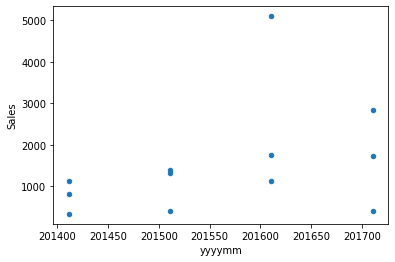

In [ ]:
df_final.plot(kind="scatter", x="yyyymm", y="Sales")

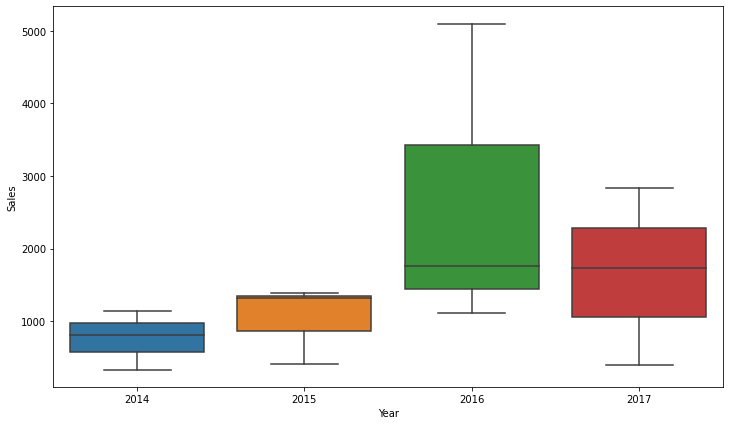

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Year',y='Sales',data=df_final)
plt.show()

## Regresion lineal

In [ ]:
df_final.dtypes

Year          int64
Month         int64
yyyymm        int64
Category     object
Sales       float64
dtype: object

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

cat = df_final[["Category"]]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
print(len(cat))
housing_cat_1hot = cat_encoder.fit_transform(cat)
housing_cat_1hot.toarray()
cat_encoder.categories_

12


[array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)]

In [ ]:
df_dyummys = pd.DataFrame(housing_cat_1hot.toarray())
df_dyummys.columns = ['Furniture', 'Office Supplies', 'Technology']
df_dyummys
df_final_dummys = pd.concat([df_final.reset_index(drop=True), df_dyummys.reset_index(drop=True)], axis=1)
df_final_dummys.pop('Category')
df_final_dummys

,Year,Month,yyyymm,Sales,Furniture,Office Supplies,Technology
0,2014,11,201411,808.9320,1.0,0.0,0.0
1,2014,11,201411,333.1180,0.0,1.0,0.0
2,2014,11,201411,1138.7800,0.0,0.0,1.0
3,2015,11,201511,1315.3955,1.0,0.0,0.0
4,2015,11,201511,404.7700,0.0,1.0,0.0
5,2015,11,201511,1389.6180,0.0,0.0,1.0
6,2016,11,201611,1762.9620,1.0,0.0,0.0
7,2016,11,201611,1115.7280,0.0,1.0,0.0
8,2016,11,201611,5099.8610,0.0,0.0,1.0
9,2017,11,201711,1734.0280,1.0,0.0,0.0


# Aca se hace la correlación

In [ ]:
corr_matrix = df_final_dummys.corr()
corr_matrix["Sales"].sort_values(ascending=False)

Sales              1.000000
yyyymm             0.377869
Year               0.377869
Technology         0.265462
Furniture         -0.067817
Office Supplies   -0.197645
Month                   NaN
Name: Sales, dtype: float64

In [ ]:
corr_matrix = df_final_dummys.corr()
corr_matrix["Category"].sort_values(ascending=False)

In [ ]:
df_sales_by_year = dataset[['Year','Sales']].groupby(['Year'],as_index=False).sum()
df_sales_by_year

,Year,Sales
0,2014,484247.4981
1,2015,470532.5090
2,2016,609205.5980
3,2017,733215.2552


In [ ]:
df_sales_by_category = dataset[['Category', 'Sales']].groupby(['Category'],as_index=False).sum()
df_sales_by_category

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


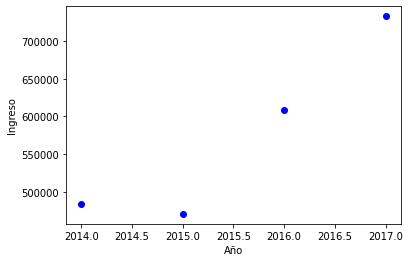

In [ ]:
import matplotlib.pyplot as plt

plt.ylabel("Ingreso")
plt.xlabel("Año")
plt.scatter(df_sales_by_year["Year"], df_sales_by_year["Sales"], color="blue")
plt.show()

# Modelo con mas de una variable

In [ ]:
df_model = df_final_dummys[['Year','Technology','Furniture','Office Supplies','Sales']]

In [ ]:
x = df_model[['Year','Technology','Furniture','Office Supplies']] # independientes
y = df_model[['Sales']] #dependiente

In [ ]:
from sklearn.linear_model import LinearRegression

regresion = LinearRegression(fit_intercept = True)

model = regresion.fit(x, y)

print("Intersección (b)", model.intercept_)
print("Pendiente (m)", model.coef_)

Intersección (b) [-865486.98646667]
Pendiente (m) [[ 430.17335     477.83129167 -122.07108333 -355.76020833]]


# De aca comienza modelo con una variable

Relacionamos Sales and Year

In [ ]:
from sklearn.linear_model import LinearRegression

regresion = LinearRegression(fit_intercept = True)

#Primero armamos el modelo con un polinomio de grado 1

x = df_sales_by_year["Year"].values.reshape((-1, 1)) # variables independientes
y = df_sales_by_year["Sales"].values.reshape((-1, 1)) # variable dependiente

model_1 = regresion.fit(x, y)

print("Intersección (b)", model_1.intercept_)
print("Pendiente (m)", model_1.coef_)

Intersección (b) [-1.77913615e+08]
Pendiente (m) [[88557.63603]]


w_1 88557.63603000001
w_2 88557.63603000001
R^2 0.8646662968804718


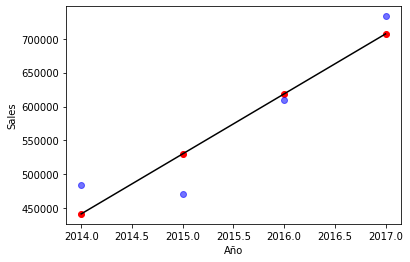

In [ ]:
#Con el modelo, usamos el predict
#predict() function enables us to predict the labels of the data values on the basis of the trained model
#Además graficamos

x_p = [[i] for i in range(2014, 2018)]
y_1 = model_1.predict(x_p)

print('w_1', model_1.coef_[0][0])
print('w_2', model_1.coef_[0][0])
print('R^2', model_1.score(x_p, y))
#CHEQUEAR SI ESTA BIEN CALCULAR R^2 ACÁ Y SI ESTÁ BIEN HECHO ASI

plt.scatter(x_p, y_1, color="red")
plt.plot(x_p, y_1, color="black")

plt.ylabel("Sales")
plt.xlabel("Año")
plt.scatter(df_sales_by_year["Year"], df_sales_by_year["Sales"], color="blue", alpha=0.55)
plt.show()

#Los puntos rojos serían los predicted para 2018?

#Vemos que los azules se alejan de la recta.
#En el caso de que esté bien calcular el R^2 para el polinomio de grado 1,
#Vemos que es un poquito menor que el del polinomio de grado 2 (0.9). Se ajusta
#mejor al modelo 2


# Donde aparece el dato de 2018??
# Robert por que predict en grado uno y no en dos solamemte que es mejor.

In [ ]:
#Ahora armamos el modelo con polinomio de grado 2 

from sklearn.preprocessing import PolynomialFeatures

poly_2  = PolynomialFeatures(degree = 2, include_bias = False)
x_2     = poly_2.fit_transform(x)

model_2 = LinearRegression(fit_intercept = True)
model_2.fit(x_2, y)

# Obtención de los parametros de ajuste
print('w_1', model_2.coef_[0][0])
print('w_2', model_2.coef_[0][1])
print('R^2', model_2.score(x_2, y))
#Acá vemos que el R^2 se acerca bastante a 1, el modelo se ajustaría bastante
#bien para un polinomio de grado 2.

w_1 -138703454.672787
w_2 34431.16157499801
R^2 0.9692321384683001


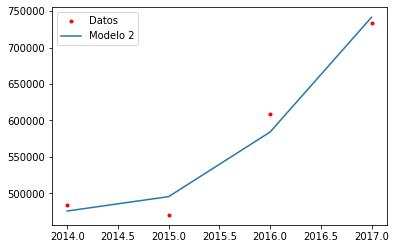

In [ ]:
#Ya tenemos el modelo, usamos el predict

x_p = [[i] for i in range(2014, 2018)]
y_2 = model_2.predict(poly_2.fit_transform(x_p))

#Graficamos

plt.plot(x, y, 'r.', label = 'Datos')
plt.plot(x_p, y_2, label = 'Modelo 2')
plt.legend(loc = 2)

#Vemos que la curva se acerca a los puntos

w_1 -29.585952994058584
w_2 -27.661627847879465
R^2 0.999999999999387


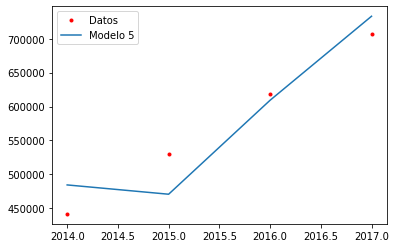

In [ ]:
# Armamos el modelo con un polinomio de grado 5
poly_5  = PolynomialFeatures(degree = 5, include_bias= False)
x_5     = poly_5.fit_transform(x)
model_5 = LinearRegression(fit_intercept = True)
model_5.fit(x_5, y)

#Coeficientes- ¿Está ok calcularlos?
print('w_1', model_5.coef_[0][0])
print('w_2', model_5.coef_[0][1])
print('R^2', model_5.score(x_5, y))

#Predict

x_p = [[i] for i in range(2014, 2018)]
y_5 = model_5.predict(poly_5.fit_transform(x_p))

#Graficamos

plt.plot(x, y_1, 'r.', label = 'Datos')
plt.plot(x_p, y_5, label = 'Modelo 5')
plt.legend(loc = 2)

#El modelo 5 se ajusta muy bien, pero hay que tener cuidado.
#El R^2 se acerca demasiado a 1 (0.99999...)
#Riesgo de que haya un sobre ajuste.

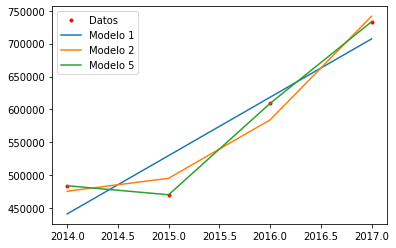

In [ ]:
#Graficamos los 3 modelos juntos
plt.plot(x, y, 'r.', label = 'Datos')
plt.plot(x_p, y_1, label = 'Modelo 1')
plt.plot(x_p, y_2, label = 'Modelo 2')
plt.plot(x_p, y_5, label = 'Modelo 5')
plt.legend(loc = 2)
plt.show()

Relacionamos Sales con Furniture

In [ ]:
df_final.dtypes
#Como category es un object, tenemos que cambiar el type a 
#float o a int. Eso creo que ya está hecho

Year          int64
Month         int64
yyyymm        int64
Category     object
Sales       float64
dtype: object

In [ ]:
from sklearn.linear_model import LinearRegression

regresion = LinearRegression(fit_intercept = True)

#Armamos el modelo con un polinomio de grado 1

#Definimos el df_sales_by_category pasándolo a int64 para que el 
#modelo pueda relacionar furniture (category) y sales
df_sales_by_category = df_final_dummys
x= df_sales_by_category["Furniture"].values.reshape((-1, 1)) # variables independientes
y= df_sales_by_category["Sales"].values.reshape((-1, 1)) # variable dependiente

model_f = regresion.fit(x, y)

print("Intersección (b)", model_f.intercept_)
print("Pendiente (m)", model_f.coef_)

Intersección (b) [1588.436]
Pendiente (m) [[-183.106625]]


In [ ]:
#Con el modelo, usamos el predict
#predict() function enables us to predict the labels of the data values on the basis of the trained model
#Además graficamos

x_p = [[i] for i in range(2014, 2018)]
y_f = model_f.predict(x_p)

print('w_1', model_f.coef_[0][0])
print('w_2', model_f.coef_[0][0])
print('R^2', model_f.score(x_p, y_f)) 
#REVISAR


w_1 -183.1066249999999
w_2 -183.1066249999999
R^2 1.0


In [ ]:
from sklearn.linear_model import LinearRegression

regresion = LinearRegression(fit_intercept = True)

#Armamos el modelo con un polinomio de grado 1

#Definimos el df_sales_by_category pasándolo a int64 para que el 
#modelo pueda relacionar furniture (category) y sales
df_sales_by_category = df_final_dummys
df_sales_by_category["Office Supplies"] = df_sales_by_category["Office Supplies"].astype("int64")
x= df_sales_by_category["Office Supplies"].values.reshape((-1, 1)) # variables independientes
y = df_sales_by_category["Sales"].values.reshape((-1, 1)) # variable dependiente

model_o=LinearRegression()
model_o = regresion.fit(x, y)

print("Intersección (b)", model_o.intercept_)
print("Pendiente (m)", model_o.coef_)

In [ ]:
x_o = [[i] for i in range(2014, 2018)]
y_o = model_o.predict(x_o)

print('w_1', model_o.coef_[0][0])
print('w_2', model_o.coef_[0][0])
print('R^2', model_o.score(x_o, y_o)) 

### A partir de aca arranca lo que estabaa hecho antes (no sigue el modelo de una variable sino que hay partes del eda y de la correlacion)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Row ID      9994 non-null   int64         
 1   Order Date  9994 non-null   datetime64[ns]
 2   Category    9994 non-null   object        
 3   Sales       9994 non-null   float64       
 4   Quantity    9994 non-null   int64         
 5   Profit      9994 non-null   float64       
 6   Year        9994 non-null   int64         
 7   Month       9994 non-null   int64         
 8   Day         9994 non-null   int64         
 9   yyyymm      9994 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(1)
memory usage: 780.9+ KB


,Row ID,Order Date,Category,Sales,Quantity,Profit,Year,Month,Day,yyyymm
5549,5550,2014-11-28,Technology,139.930,7,34.9825,2014,11,28,201411
8572,8573,2014-11-28,Technology,998.850,5,-199.7700,2014,11,28,201411
385,386,2015-11-27,Technology,83.976,3,-1.0497,2015,11,27,201511
3062,3063,2015-11-27,Technology,83.970,3,23.5116,2015,11,27,201511
3063,3064,2015-11-27,Technology,104.970,3,7.3479,2015,11,27,201511
4337,4338,2015-11-27,Technology,107.970,3,22.6737,2015,11,27,201511
5186,5187,2015-11-27,Technology,748.752,8,-162.2296,2015,11,27,201511
7670,7671,2015-11-27,Technology,259.980,2,88.3932,2015,11,27,201511
6574,6575,2016-11-25,Technology,319.920,8,118.3704,2016,11,25,201611
6977,6978,2016-11-25,Technology,59.980,2,17.9940,2016,11,25,201611


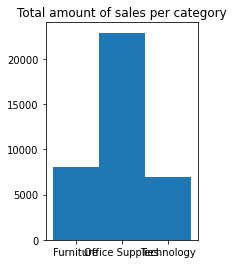

In [ ]:




# Eliminacion de columnas innnecesarias para el estudio

del dataset['Country']
del dataset['Ship Date']
del dataset['State']
del dataset['Product ID']
del dataset['Product Name']
del dataset['Discount']

# Datasets individuales segun categoria

furniture = dataset[dataset["Category"]=="Furniture"]
office_supplies = dataset[dataset["Category"]=="Office Supplies"]
technology = dataset[dataset["Category"]=="Technology"]

# Tipo de datos de cada columna
dataset.info()

# Suma de cantidad de ventas en cada categoria
# Plot de grafico de barras segun cantidad de ventas

quantity_f = furniture['Quantity'].sum()
quantity_o = office_supplies['Quantity'].sum()
quantity_t = technology['Quantity'].sum()
plt.subplot(1,2,1)
compras_totales = plt.bar(['Furniture', 'Office Supplies', 'Technology'], [quantity_f,quantity_o,quantity_t], width=1)
plt.title("Total amount of sales per category")


# Filtro de los datasets por categoria segun fecha en la que cayo el black friday

f_black = furniture.loc[(furniture['Order Date']=='28/11/2014') | (furniture['Order Date']=='27/11/2015') | (furniture['Order Date']=='25/11/2016') | (furniture['Order Date']=='24/11/2017')]
o_black = office_supplies[(office_supplies['Order Date']=='28/11/2014') | (office_supplies['Order Date']=='27/11/2015') | (office_supplies['Order Date']=='25/11/2016') | (office_supplies['Order Date']=='24/11/2017')]
t_black = technology[(technology['Order Date']=='28/11/2014') | (technology['Order Date']=='27/11/2015') | (technology['Order Date']=='25/11/2016') | (technology['Order Date']=='24/11/2017')]

# Ordenar de manera ascendente por fecha los datasets de cada categoria

f_black = f_black.sort_values('Order Date', ascending=True)
f_black.head()
o_black = o_black.sort_values('Order Date', ascending=True)
o_black.head()
t_black = t_black.sort_values('Order Date', ascending=True)
t_black.head()



t_black


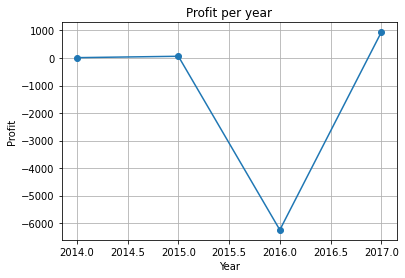

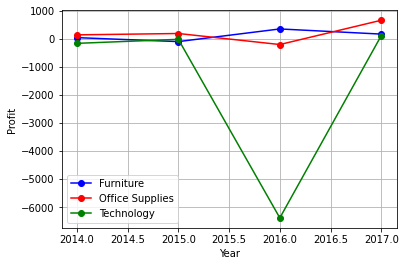

,Row ID,Order Date,Category,Sales,Quantity,Profit,Year,Month,Day,yyyymm
5549,5550,2014-11-28,Technology,139.930,7,34.9825,2014,11,28,201411
8572,8573,2014-11-28,Technology,998.850,5,-199.7700,2014,11,28,201411
385,386,2015-11-27,Technology,83.976,3,-1.0497,2015,11,27,201511
3062,3063,2015-11-27,Technology,83.970,3,23.5116,2015,11,27,201511
3063,3064,2015-11-27,Technology,104.970,3,7.3479,2015,11,27,201511
4337,4338,2015-11-27,Technology,107.970,3,22.6737,2015,11,27,201511
5186,5187,2015-11-27,Technology,748.752,8,-162.2296,2015,11,27,201511
7670,7671,2015-11-27,Technology,259.980,2,88.3932,2015,11,27,201511
6574,6575,2016-11-25,Technology,319.920,8,118.3704,2016,11,25,201611
6977,6978,2016-11-25,Technology,59.980,2,17.9940,2016,11,25,201611


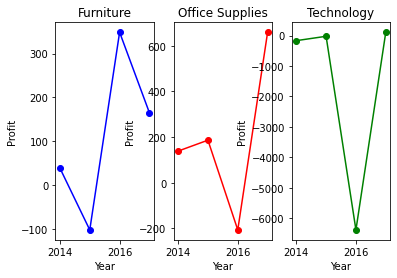

In [ ]:
# Sumar sales segun cada ano

anualsales_f = [ f_black.iloc[0:2 , 5].sum(), f_black.iloc[2:7 , 5].sum() , f_black.iloc[7:9 , 5].sum(), f_black.iloc[9:13 , 5].sum() ]
anualsales_o = [ o_black.iloc[0:9 , 5].sum(), o_black.iloc[9:15 , 5].sum() , o_black.iloc[15:20 , 5].sum(), o_black.iloc[20:38 , 5].sum() ]
anualsales_t = [ t_black.iloc[0:2 , 5].sum(), t_black.iloc[2:8 , 5].sum() , t_black.iloc[8:13 , 5].sum(), t_black.iloc[13:16 , 5].sum() ]

# Plot de profit total por año
anualprofit_f = anualsales_f #!! reemplazar anualsales_f por el calculo del anualprofit_f
anualprofit_o = anualsales_o #!! reemplazar anualsales_o por el calculo del anualsales_o GAB
anualprofit_t = anualsales_t #!! reemplazar anualsales_t por el calculo del anualsales_t

a=np.array(anualprofit_f)
b=np.array(anualprofit_o)
c=np.array(anualprofit_t)
anualprofit_fot=a + b + c
graph_fot=plt.plot([2014,2015,2016,2017] , anualprofit_fot , marker='o')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Profit per year')
plt.grid()
plt.show()

# Plot del profit en una grafica (todos juntos)

graph_f=plt.plot([2014,2015,2016,2017] , anualprofit_f , color='b' , label ='Furniture' , marker = 'o')
graph_o=plt.plot([2014,2015,2016,2017] , anualprofit_o , color='r' , label ='Office Supplies' , marker = 'o')
graph_t=plt.plot([2014,2015,2016,2017] , anualprofit_t , color='g' , label ='Technology' , marker = 'o')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Profit')
plt.legend(['Furniture','Office Supplies','Technology'])
plt.show()

# Plot del profit en una grafica (separados)

plt.subplot(1,3,1)
graph_f=plt.plot([2014,2015,2016,2017] , anualprofit_f, color='b' , marker = 'o')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title("Furniture")
plt.subplot(1,3,2)
graph_o=plt.plot([2014,2015,2016,2017] , anualprofit_o, color='r' , marker = 'o')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title("Office Supplies")
plt.subplot(1,3,3)
graph_t=plt.plot([2014,2015,2016,2017] , anualprofit_t, color='g' , marker = 'o')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title("Technology")
t_black

# Preguntar a Roberto por estos numeros nefastos
# Preguntar a Robert porque no apaerece el label
# correlacion
# "Autorizar con GitHub"

## Correlaciones

Predict: {furprediction}
intercept (ordenada): {model.intercept_
Coefficients: [[0.0006293]]
[[ 41.9136]
 [219.582 ]
 [  6.8714]
 ...
 [ 19.3932]
 [ 13.32  ]
 [ 72.948 ]]
[[3.79791623]
 [3.9097235 ]
 [3.77586406]
 ...
 [3.78374407]
 [3.77992219]
 [3.81744627]]


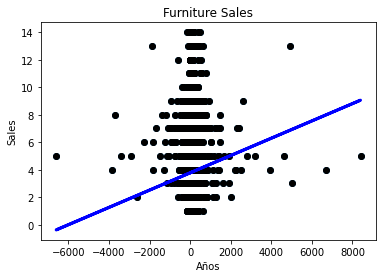

Coeficiente r: {r_sq}


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
wat = pd.read_csv("wat.csv", sep=';', decimal=',')

profit_f = np.array(wat.Profit) #profit_f no estaba declarado así que lo declaré hay que calcular bien su valor
quantity_f = np.array(wat.Quantity) #quantity_f no estaba declarado así que lo declaré hay que calcular bien su valor
#Regresión lineal de Sales- Furniture
pr=np.array(profit_f) 
sa=np.array(quantity_f)
#Reshapeo
x_anos=pr.reshape((-1,1))
y_fur=sa.reshape((-1,1))
plt.scatter(x_anos,y_fur)

#Creamos el modelo
model=LinearRegression()
model.fit(x_anos,y_fur)

#Predicción del modelo
furprediction=model.predict([[2018]])
print("Predict: {furprediction}")
print("intercept (ordenada): {model.intercept_")
print("Coefficients:", model.coef_)

#Gráfico con la linea de regresión lineal
predicv=model.predict(x_anos)
print(x_anos)
print(predicv)
plt.scatter(x_anos,y_fur,color='black')
plt.plot(x_anos,predicv,color='blue',linewidth=3)
plt.title("Furniture Sales")
plt.xlabel("Años")
plt.ylabel("Sales")
plt.show()

#Calculo coeficiente de correlación (r)
r_sq=model.score(x_anos,y_fur)
print("Coeficiente r: {r_sq}")




Nro dimensiones: 2
Variable independiente: [[261.96 ]
 [731.94 ]
 [ 14.62 ]
 ...
 [258.576]
 [ 29.6  ]
 [243.16 ]]
Variable dependiente: [[ 41.9136]
 [219.582 ]
 [  6.8714]
 ...
 [ 19.3932]
 [ 13.32  ]
 [ 72.948 ]]
Las ganancias para el año 2018 serían : [[2765.36071992]]
a 193.33356300267235
b 1.2745426942101925
R^2 0.2295026511896111


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

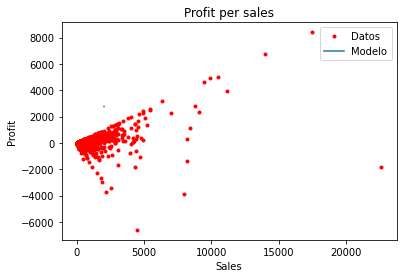

In [ ]:
#Paso profit y sales a array
pr=np.array(wat.Profit)
sa=np.array(wat.Sales)
#Reshapeo
x=pr.reshape((-1,1))
y=sa.reshape((-1,1))
#Teniendo en cuenta que nuestra variable dependiente es profit:
print('Nro dimensiones:',x.ndim)
print('Variable independiente:',y)
print('Variable dependiente:',x)

#Creo el modelo
model = LinearRegression()
model.fit(x, y)

#Queremos determinar ganancias para el 2018

#Obtención de estimaciones
print('Las ganancias para el año 2018 serían :', model.predict([[2018]]))

#Predicción del modelo
x_pred = model.predict(y);

#Obtención de los parametros de ajuste
print('a', model.intercept_[0])
print('b', model.coef_[0][0])
print('R^2', model.score(x, y))

#Representamos el modelo de forma gráfica
y_p = [[2014], [2018]]
x_p = model.predict(y_p)

plt.plot(y, x, 'r.', label = 'Datos')
plt.plot(y_p, x_p, label = 'Modelo')

plt.title(u'Profit per sales')
plt.xlabel('Sales')
plt.ylabel(u'Profit')
plt.legend()
#wtf esto no puede estar bien
#coeficiente de correlación entre x e y
np.corrcoef(y,x)
#wtf esto tampoco puede estar bien
#no entiendo nada
#aiuda